# Speaker Diarization and Audio Segmentation Project:

## Installing required dependencies

In [1]:
!pip install yt_dlp pydub librosa numpy scipy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.4 MB/s eta 0:00:00


In [2]:
!pip install spleeter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 942.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 101.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install simple-Diarizer

  Using cached simple_diarizer-0.0.13-py3-none-any.whl (23 kB)
  Using cached speechbrain-0.5.16-py3-none-any.whl (630 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Using cached HyperPyYAML-1.2.2-py3-none-any.whl (16 kB)
  Using cached ruamel.yaml-0.18.6-py3-none-any.whl (117 kB)
  Using cached ruamel.yaml.clib-0.2.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (526 kB)


## Incorporating the necessary dependencies

In [3]:
import yt_dlp
import os
from pydub import AudioSegment
from spleeter.separator import Separator
import tensorflow as tf
import soundfile as sf
import subprocess
from simple_diarizer.diarizer import Diarizer
from simple_diarizer.utils import (check_wav_16khz_mono, convert_wavfile, waveplot, combined_waveplot, waveplot_perspeaker)
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
import numpy as np
from scipy.io.wavfile import write
from pydub import AudioSegment

## Working of the Project

### Retrieving the video to be processed from YouTube

In [4]:
def download_youtube_videos(links, output_directory='downloads'):
    try:
        if not os.path.exists(output_directory):
            os.makedirs(output_directory)
        ydl_opts = {
            'format': 'bestvideo+bestaudio/best',
            'outtmpl': os.path.join(output_directory, 'video.%(ext)s'),
            'merge_output_format': 'mp4',
        }
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            for link in links:
                ydl.download([link])
        print(f"Videos downloaded successfully to '{output_directory}'.")
    except Exception as e:
        print(f"Error: {e}")
if __name__ == "__main__":
    video_links = [
        'https://www.youtube.com/watch?v=U8Psr5FoyNc',
        # Add more video links as needed
    ]
    download_youtube_videos(video_links)


[youtube] Extracting URL: https://www.youtube.com/watch?v=U8Psr5FoyNc
[youtube] U8Psr5FoyNc: Downloading webpage
[youtube] U8Psr5FoyNc: Downloading ios player API JSON
[youtube] U8Psr5FoyNc: Downloading android player API JSON
[youtube] U8Psr5FoyNc: Downloading m3u8 information
[info] U8Psr5FoyNc: Downloading 1 format(s): 616+251
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 313
[download] Destination: downloads/video.f616.mp4
[download] 100% of  279.13MiB in 00:00:43 at 6.36MiB/s                   
[download] Destination: downloads/video.f251.webm
[download] 100% of   27.58MiB in 00:00:00 at 52.95MiB/s  
[Merger] Merging formats into "downloads/video.mp4"
Deleting original file downloads/video.f616.mp4 (pass -k to keep)
Deleting original file downloads/video.f251.webm (pass -k to keep)
Videos downloaded successfully to 'downloads'.


### Converting the video file from (.mp4) to (.wav), configuring it as a mono-channel WAV file, and adjusting its sample rate to 22050 Hz.

In [5]:
inputdir = '/content/downloads/'

for filename in os.listdir(inputdir):
    if filename.endswith(".mp4"):
        actual_filename = filename[:-4]
        audio = AudioSegment.from_file(os.path.join(inputdir, filename), format="mp4")
        # Convert to mono channel and 22050 Hz
        audio = audio.set_channels(1).set_frame_rate(22050)
        audio.export(os.path.join(inputdir, actual_filename + ".wav"), format="wav")
    else:
        continue

### Eliminating background audio elements such as instruments and tunes.

In [ ]:
output_processed_file = "/content/downloads/video.mp4"
separator = Separator('spleeter:2stems')
output_directory = "/content/Spleeter_output_dir"
os.makedirs(output_directory, exist_ok=True)
separator.separate_to_file(output_processed_file, output_directory)
vocals_file = None
for root, dirs, files in os.walk(output_directory):
    for file in files:
        if 'vocals' in file:
            old_path = os.path.join(root, file)
            new_path = os.path.join(root, f"vocals_.wav")
            os.rename(old_path, new_path)
            vocals_file = new_path
        if 'accompaniment' in file:
            os.remove(os.path.join(root, file))
if vocals_file:
    print("Vocals extraction complete. Vocals file path:", vocals_file)
else:
    print("Failed to extract vocals.")


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Validating archive checksum


INFO:spleeter:Validating archive checksum


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:2stems model file(s) extracted


INFO:spleeter:2stems model file(s) extracted
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
Colocations handled automatically by placer.


### Segmenting the audio file through diarization.

In [ ]:
NUM_SPEAKERS = 2  # The number of speakers
vocals_file = "/content/Spleeter_output_dir/video/vocals_.wav"
# Output directory for the diarized files
output_directory = "/content/diarized_audio_outputs/"
print(output_directory)
# Ensure the output directory exists, create it if it doesn't
os.makedirs(output_directory, exist_ok=True)
converted_vocal_file = convert_wavfile(vocals_file, f"{os.path.splitext(vocals_file)[0]}_converted.wav")
print("cvf -",converted_vocal_file)

/content/diarized_audio_outputs/
cvf - /content/Spleeter_output_dir/video/vocals__converted.wav


In [ ]:
# Verify if the conversion was successful
if os.path.isfile(vocals_file):
    print("Conversion successful. Converted WAV file:", vocals_file)
else:
    print("Conversion failed. Converted WAV file not found:", vocals_file)
diarizer = Diarizer(
    embed_model='ecapa',  # supported types: ['xvec', 'ecapa']
    cluster_method='sc',  # supported types: ['ahc', 'sc']
    window=1.5,  # size of window to extract embeddings (in seconds)
    period=0.75  # hop of window (in seconds)
)
segments = diarizer.diarize(vocals_file, num_speakers=NUM_SPEAKERS, outfile=f"{os.path.join(output_directory, 'diarized_' + os.path.basename(vocals_file))}.rttm")


### Retrieving time stamps for speakers labeled as 0 and 1.

In [ ]:
segments

[(0.098, 1.2459375, 1, 4321, 54945),
 (1.538, 2.8459375, 1, 67825, 125505),
 (3.266, 6.3659375, 1, 144030, 280737),
 (6.786, 10.6219375, 0, 299262, 468427),
 (10.786, 13.7899375, 1, 475662, 608136),
 (14.146, 18.271, 0, 623838, 805751),
 (18.271, 19.8059375, 1, 805751, 873441),
 (20.578, 21.4699375, 1, 907489, 946824),
 (21.922, 22.4939375, 1, 966760, 991982),
 (23.106, 26.2059375, 0, 1018974, 1155681),
 (26.562, 27.4859375, 1, 1171384, 1212129),
 (28.066, 29.7899375, 1, 1237710, 1313736),
 (30.146, 35.2939375, 0, 1329438, 1556462),
 (35.522, 37.397, 0, 1566520, 1649207),
 (37.397, 39.1339375, 1, 1649207, 1725806),
 (39.33, 43.6139375, 0, 1734453, 1923374),
 (43.778, 46.2699375, 1, 1930609, 2040504),
 (46.466, 49.091, 0, 2049150, 2164913),
 (49.091, 51.341, 1, 2164913, 2264138),
 (51.341, 53.591, 0, 2264138, 2363363),
 (53.591, 55.6779375, 1, 2363363, 2455397),
 (55.874, 58.499, 0, 2464043, 2579805),
 (58.499, 59.999, 1, 2579805, 2645955),
 (59.999, 62.3339375, 0, 2645955, 2748926),
 (

### Visualizing the speakers in the audio file through plotting.

In [ ]:
signal, fs = sf.read(vocals_file)

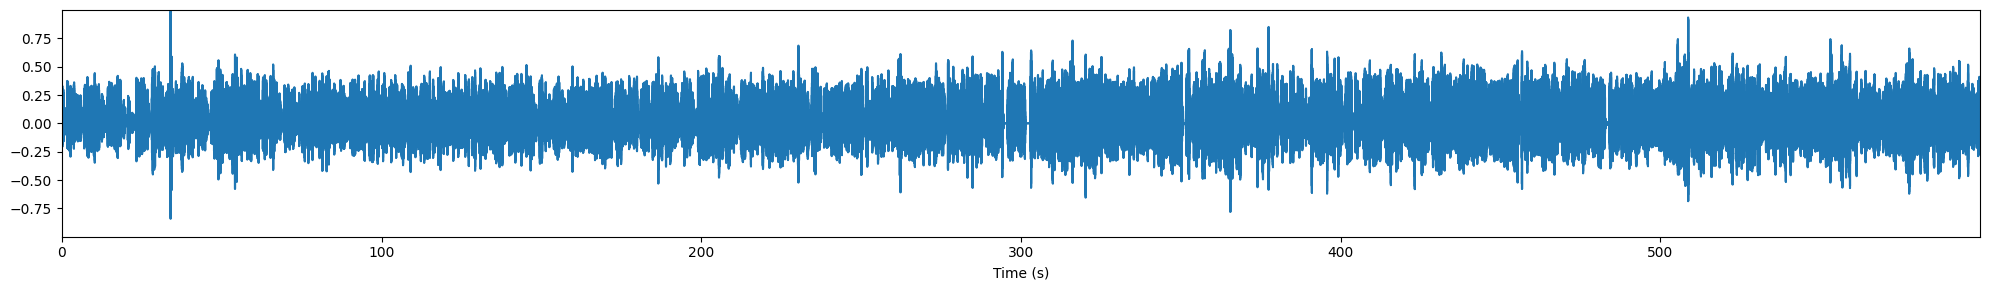

In [ ]:
waveplot(signal, fs, figsize=(20,3))
plt.show()

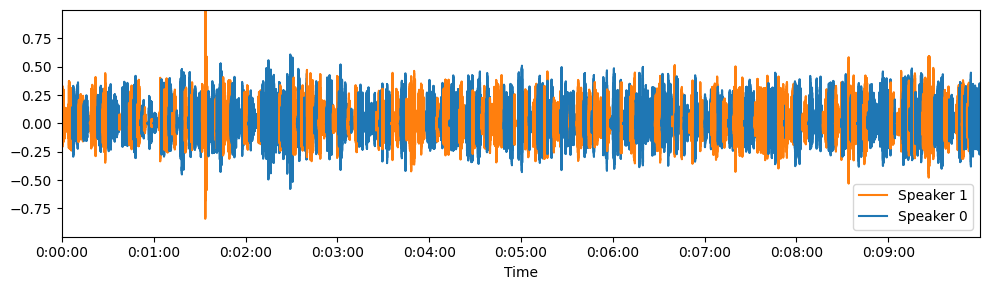

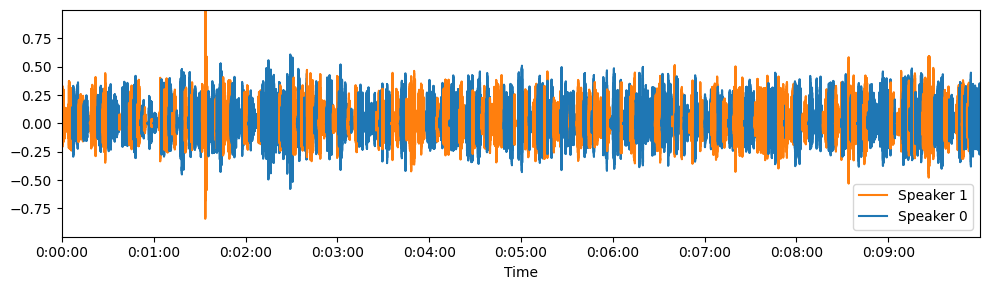

In [ ]:
combined_waveplot(signal, fs, segments, figsize=(10,3), tick_interval=60)

### Segregating the two speakers.

In [ ]:
import librosa
import numpy as np
from scipy.io.wavfile import write

def load_audio(file_path):
    signal, fs = librosa.load(file_path, sr=None)
    return signal, fs

def load_rttm(rttm_path):
    segments = []
    with open(rttm_path, 'r') as file:
        for line in file:
            tokens = line.strip().split()
            start, duration, label = float(tokens[3]), float(tokens[4]), int(tokens[7])
            end = start + duration
            start_sample, end_sample = int(start * fs), int(end * fs)
            segments.append((start, end, label, start_sample, end_sample))
    return segments

def separate_speakers(signal, segments, target_labels=[0, 1]):
    concatenated_audios = {label: [] for label in target_labels}

    for start, end, label, start_sample, end_sample in segments:
        if label in target_labels:
            concatenated_audios[label].append(signal[start_sample:end_sample])

    concatenated_audios = {label: np.concatenate(audio) for label, audio in concatenated_audios.items()}
    return concatenated_audios

def save_audios(audios, file_paths, fs):
    for label, audio in audios.items():
        write(file_paths[label], fs, (audio * 32767).astype(np.int16))

# Load audio file
file_path = '/content/Spleeter_output_dir/video/vocals_.wav'
signal, fs = load_audio(file_path)

# Load RTTM file
rttm_path = '/content/diarized_audio_outputs/diarized_vocals_.wav.rttm'
segments = load_rttm(rttm_path)

# Separate the audio of both speakers
target_labels = [0, 1]
concatenated_audios = separate_speakers(signal, segments, target_labels)

# Save the concatenated audios to files
output_file_paths = ['/content/diarized_audio_outputs/speaker_0.wav', '/content/diarized_audio_outputs/speaker_1.wav']
save_audios(concatenated_audios, output_file_paths, fs)


### Storing the audio files as 10-second chunks.

In [ ]:
def trim_and_save_audio(input_paths, output_parent_directory, output_subdirectories, chunk_duration=10):
    os.makedirs(output_parent_directory, exist_ok=True)
    for input_path, output_subdirectory in zip(input_paths, output_subdirectories):
        os.makedirs(os.path.join(output_parent_directory, output_subdirectory), exist_ok=True)
        audio = AudioSegment.from_file(input_path)
        total_duration = len(audio)
        num_chunks = total_duration // (chunk_duration * 1000)
        for i in range(num_chunks):
            start_time = i * chunk_duration * 1000
            end_time = (i + 1) * chunk_duration * 1000
            if i == num_chunks - 1:
                end_time = total_duration
            chunk = audio[start_time:end_time]
            output_path = os.path.join(output_parent_directory, output_subdirectory, f'chunk_{i + 1}.wav')
            chunk.export(output_path, format="wav")
if __name__ == "__main__":
    input_audio_paths = ['/content/diarized_audio_outputs/speaker_0.wav', '/content/diarized_audio_outputs/speaker_1.wav']
    output_parent_directory = '/content/final_chunks'
    # Specify the desired chunk duration in seconds (default is 10 seconds)
    chunk_duration = 10
    # Specify the subdirectories for each speaker
    output_subdirectories = ['speaker_0', 'speaker_1']
    trim_and_save_audio(input_audio_paths, output_parent_directory, output_subdirectories, chunk_duration)
